#### The Program involves following features:
Convolutional Neural Network CNN
1. Using Word2Vec implementing CNN model
2. Dispaly Confusion Matrix, precision, recall and F1-score
3. Display few prediction using predict module. 
4. Get 10-fold Average of the CNN model.

Support Vector Method SVM
1. Creating feature vector using TF-IDF and Bag-of-words.
2. Dispaly Confusion Matrix, precision, recall and F1-score
3. Display few prediction using predict module. 
4. Get 10-fold Average of the SVM model.

Random Foresr Method RFM 
1. Creating feature vector using TF-IDF.
2. Dispaly Confusion Matrix, precision, recall and F1-score
3. Display few prediction using predict module. 
4. Get 10-fold Average of the RFM model.

In [170]:
from __future__ import division, print_function

# dataframe
import pandas as pd

# numpy array
import numpy as np

# figures visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
import seaborn as sns

# calc accuracy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# word2vec
import gensim 
from gensim import models
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors

# CNN model and keras preprocessing
import keras
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding, Conv2D, GlobalMaxPooling2D
from keras.models import Sequential
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# nltk data preprocessing
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer

# stopword - remove buzz word
from nltk.corpus import stopwords

# splitting data
from sklearn.model_selection import train_test_split

# punctuation - data imbalance
import collections
import re
import string

# File path
import os
import os.path
from os import path

# Translator
import googletrans
from googletrans import Translator

In [203]:
# original hindi file
filename  = 'Eng-Hin-data/english-anot-shuffled'
orig_df = pd.read_csv(filename + '.csv',  
               delimiter=',')
orig_df.columns = ['Text', 'Label']


In [204]:
# Run only for English data 
orig_df["Text"] = orig_df["Text"].astype(str)
orig_df["Label"] = orig_df["Label"].astype(str)

In [205]:
orig_df.head

<bound method NDFrame.head of                                                    Text Label
0     '@Cricket_Mann And they will see more of it no...     0
1     "Juma'at Kareem to all my Muslim brother aroun...     1
2     'Thorpe becomes England head coach for Pakista...     0
3     '@ParZevil Plymouth Cricket. THREE transmissions.     0
4     'jungkook didnâ€™t get caught eating food duri...     1
...                                                 ...   ...
8433  '@xmufcalisha Looking like a cricket scoreline...     0
8434  'QAnon is a terrorist organisation. Trump is n...     2
8435  'No franchise cricket tournament has a better ...     0
8436  'we are not against every muslim but for that ...     2
8437  'Happy First Muharram ðŸ¥³ðŸŽŠðŸŽ‰  May Allah ...     1

[8438 rows x 2 columns]>

In [206]:
orig_df.Text[6]

"'@SakibulHoque8 @ImranKhanPTI Terrorist is a Muslim.ðŸ˜€"

In [207]:
df = orig_df

### Class count

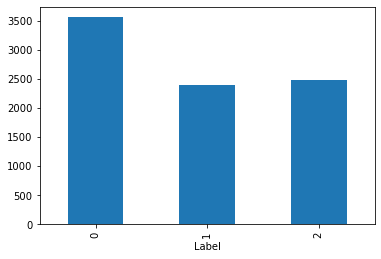

In [208]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
df.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [209]:
# For entire dataset sentences for each labels 
df.Label.value_counts()

0    3555
2    2485
1    2398
Name: Label, dtype: int64

### Balanced Data

In [210]:
#balancing data 
from collections import Counter
import numpy as np
def balanceClasses(xs, ys):
    item = {}
    new_ys = []
    new_xs = []
    #"""Undersample xs, ys to balance classes."""
    freqs = Counter(ys)
    # the most common class  is the maximum number we want for all classes
    max_allowable = (freqs.most_common()[0][1])
    
    for val in freqs.most_common(): # List
        nums = np.random.randint(1000)
        i = 1
        item[val[0]] = max_allowable - val[1]
        
        if item[val[0]] > 0:            
            while(item[val[0]] - i != 0): 
                nums = nums + 1
                if ys[nums] == val[0]:
                    i += 1
                    new_ys.append(ys[nums])
                    new_xs.append(xs[nums])
    return new_xs, new_ys

In [211]:
new_text, new_label = balanceClasses(df['Text'], df['Label'])

In [212]:
data = pd.DataFrame(new_text)
data.columns = ['Text']
data['Label'] = new_label
data = pd.concat([df, data])

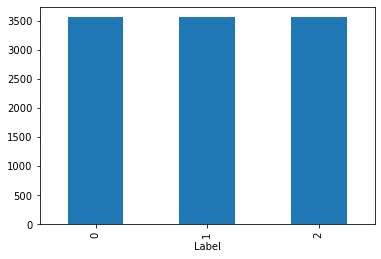

In [213]:
fig1 = plt.figure(figsize=(6,4))
data.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [214]:
# For entire dataset sentences for each labels 
data.Label.value_counts()

0    3555
1    3554
2    3554
Name: Label, dtype: int64

In [215]:

data=data.sample(frac=1).reset_index(drop=True)
data

,Text,Label
0,'Well done &amp good job our brave muslim sis...,1
1,'Damn she fr spitting verses on the Quran mash...,1
2,"""@msdhoni @narendramodi You can retire from cr...",0
3,"""Cheating is the part of Australian cricket te...",0
4,'Happy Muharram. Islamic New YearðŸŒ¸,1
...,...,...
10658,'@CPBlr Release naveen...dont buckle under jeh...,2
10659,Ramy Youssef's (@ramy) #Emmy nominations mark ...,1
10660,'oldest in dream...second youngest in 127...AN...,0
10661,'@rosenjoki13 @Sc_ott @RealDannyTommo In the U...,2


In [216]:
nan_value = float("NaN")
data.replace("", nan_value, inplace=True)
data.dropna(subset = ["Text"], inplace=True)
data.Label.value_counts()

0    3555
1    3554
2    3554
Name: Label, dtype: int64

### Data Preprocessing

In [217]:
# People usually join sentences using more than one colon 

def ReplaceDoubleColon(inputString):
    return inputString.replace("..", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceDoubleColon(x))

def ReplaceTripleColon(inputString):
    return inputString.replace("...", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceTripleColon(x))

def ReplaceFourColon(inputString):
    return inputString.replace("....", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceFourColon(x))

In [218]:
def textPattern(text):

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r" \n ", " ", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"mustn't", "must not", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\= =", " ", text)
    text = re.sub(r"\==", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

data['Text'] = data['Text'].apply(lambda x: textPattern(x))

In [219]:
data.shape

(10663, 2)

In [220]:
# Word Tokenization
tokens = [word_tokenize(sen) for sen in data.Text]

In [221]:
# Lower Case
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [222]:
# Remove Link

def removeLink(token):
    word = []
    for w in token:
        if not w.startswith('http'):
            word.append(w)
    return word 
    
removedLink_tokens = [removeLink(token) for token in lower_tokens]

In [223]:
# Word Lemmatization
def lemmatization(token):
    return [lemmatizer.lemmatize(w) for w in token] 

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatization(token) for token in removedLink_tokens]

In [224]:
filtered_words = [sen for sen in lemmatized_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [225]:
data['Text_Final'].shape

(10663,)

In [226]:
zero  = []
one = []
two = []
for l in data.Label:
    
    if l == '0':
        zero.append(1)
        one.append(0)
        two.append(0)
    elif l == '1':
        zero.append(0)
        one.append(1)
        two.append(0)
    elif l == '2':
        zero.append(0)
        one.append(0)
        two.append(1)
        
data['0']= zero
data['1']= one
data['2']= two

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2']]

In [227]:
category_id = []
for l in data.Label:
    
    if l == '0':
        category_id.append('0')
    elif l == '1':
        category_id.append('1')
    elif l == '2':
        category_id.append('2')
        
data['Category_id'] = category_id

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2', 'Category_id' ]]
data.head(9)

,Text_Final,tokens,Label,0,1,2,Category_id
0,well done amp good job our brave muslim sister,"[well, done, amp, good, job, our, brave, musli...",1,0,1,0,1
1,damn she fr spitting verse on the quran mashal...,"[damn, she, fr, spitting, verse, on, the, qura...",1,0,1,0,1
2,msdhoni narendramodi you can retire from crick...,"[msdhoni, narendramodi, you, can, retire, from...",0,1,0,0,0
3,cheating is the part of australian cricket tea...,"[cheating, is, the, part, of, australian, cric...",0,1,0,0,0
4,happy muharram islamic new year,"[happy, muharram, islamic, new, year]",1,0,1,0,1
5,salmannizami hello bloody muslim terrorist if ...,"[salmannizami, hello, bloody, muslim, terroris...",2,0,0,1,2
6,saj pakpassion i wonder how he connected ertug...,"[saj, pakpassion, i, wonder, how, he, connecte...",0,1,0,0,0
7,population jihad : one cricket team with two u...,"[population, jihad, :, one, cricket, team, wit...",0,1,0,0,0
8,tarak9999 n t rama rao jr wish you a very happ...,"[tarak9999, n, t, rama, rao, jr, wish, you, a,...",1,0,1,0,1


In [228]:
data.dropna(subset = ["tokens"], inplace=True)

In [229]:
from io import StringIO
category_id_df = data[['Label', 'Category_id']].drop_duplicates().sort_values('Category_id')
category_to_label_dict = dict(category_id_df.values)
label_to_category_dict = dict(category_id_df[['Category_id', 'Label']].values)

#### Split Data into test and train
We will use 90 % data for training and 20 % for testing. We use random state so every time we get the same training and testing data.

In [230]:
data_train, data_test = train_test_split(data, test_size=0.10, random_state=42)


In [231]:
# # total training words
totalTrainingWords = [word for tokens in data_train["tokens"] for word in tokens]

# # Storing Length of the training sentence
lengthTrainingSentences = [len(tokens) for tokens in data_train["tokens"]]

# # training Vocabulary size
trainingVocabSize = sorted(list(set(totalTrainingWords)))

## Total number of lines
linesCount = len(data_train["tokens"])

### Load Google News Word2Vec model

In [232]:
# Convert Glove file to word2vec format (examples: uses 50 dimensions since it's faster)
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'Online_supplement_1 word vectors.csv'  # I unzipped in glove.6B subdirectory 
word2vec_output_file = 'glove.6B.300d.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(1181931, 0)

In [233]:
# Use the converted Glove file
filename = 'glove.6B.300d.word2vec'
word2vec = KeyedVectors.load_word2vec_format(filename, binary=False)


In [234]:
MAX_SEQUENCE_LENGTH = 150
EMBEDDING_DIM = 50


### Tokenize and Pad sequences

In [235]:
tokenizer = Tokenizer(num_words=len(trainingVocabSize), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 15616 unique tokens.


In [236]:
cnnTrainData = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [237]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(15617, 50)


In [238]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
cnnTestData = pad_sequences(test_sequences, maxlen= MAX_SEQUENCE_LENGTH)

### Define CNN

The model is from the paper 'Convolutional Neural Networks for Sentence Classification' we have updated the network according to our requirement [1]

In [239]:
label_names = ['0', '1', '2']

In [240]:
def ConvolutionalNeuralNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    # Embedding layer
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    
    #Kernal (window) size
    filter_sizes = [2,3,4,5]

    # Convolution Layer and max-pooling
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=512, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)
        
    l_merge = concatenate(convs, axis=1)
    
    # softmax layer for multiclass identification 
    x = Dropout(0.1)(l_merge)  
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss= 'categorical_crossentropy',
                 optimizer = keras.optimizers.RMSprop(learning_rate=1e-3),
#                    optimizer='adam',
                  metrics=['accuracy'])
    return model

In [241]:
# Splitting train data into X_train and y_train
y_train = data_train[label_names].values
x_train = cnnTrainData
y_tr = y_train

In [242]:
# Splitting train data into X_test and y_test
y_test = data_test[label_names].values
x_test = cnnTestData
y_tst = y_test

In [243]:
model = ConvolutionalNeuralNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, len(list(label_names)))

In [244]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 150, 50)      780850      input_13[0][0]                   
__________________________________________________________________________________________________
conv1d_48 (Conv1D)              (None, 149, 512)     51712       embedding_12[0][0]               
__________________________________________________________________________________________________
conv1d_49 (Conv1D)              (None, 148, 512)     77312       embedding_12[0][0]               
___________________________________________________________________________________________

### Train CNN

In [245]:
num_epochs = 10
batch_size = 512

In [246]:
history = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/10
17/17 [==============================] - 12s 731ms/step - loss: 2.0097 - accuracy: 0.4103 - val_loss: 1.0376 - val_accuracy: 0.3260
Epoch 2/10
17/17 [==============================] - 13s 744ms/step - loss: 1.0001 - accuracy: 0.4957 - val_loss: 0.8463 - val_accuracy: 0.7521
Epoch 3/10
17/17 [==============================] - 12s 718ms/step - loss: 0.8549 - accuracy: 0.6018 - val_loss: 0.8109 - val_accuracy: 0.5292
Epoch 4/10
17/17 [==============================] - 13s 739ms/step - loss: 0.6724 - accuracy: 0.7028 - val_loss: 2.2468 - val_accuracy: 0.3781
Epoch 5/10
17/17 [==============================] - 12s 733ms/step - loss: 0.6304 - accuracy: 0.7720 - val_loss: 0.7170 - val_accuracy: 0.6885
Epoch 6/10
17/17 [==============================] - 13s 737ms/step - loss: 0.5098 - accuracy: 0.7923 - val_loss: 0.3786 - val_accuracy: 0.8813
Epoch 7/10
17/17 [==============================] - 13s 736ms/step - loss: 0.3983 - accuracy: 0.8522 - val_loss: 0.6290 - val_accuracy: 0.7063

In [247]:
# evaluate on test data
results = model.evaluate(x_test, y_tst)

34/34 [==============================] - 1s 15ms/step - loss: 0.2418 - accuracy: 0.8969


In [248]:
# predict model
predictions = model.predict(cnnTestData, batch_size=1024, verbose=1)

2/2 [==============================] - 0s 10ms/step


### Testing few sentences using our model

In [249]:

labels = ['0', '1', '2']

def makeprediction(texts):
    tk = Tokenizer()
    tk.fit_on_texts(texts)
    index_list = tk.texts_to_sequences(texts)
    x_train = pad_sequences(index_list, maxlen=150)
    pred = model.predict(x_train)
    result = labels[np.argmax(pred)]
    return result

In [250]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [251]:
sum(data_test.Label==prediction_labels)/len(prediction_labels)

0.8969072164948454

In [252]:
data_test.Label.value_counts()

1    382
0    350
2    335
Name: Label, dtype: int64

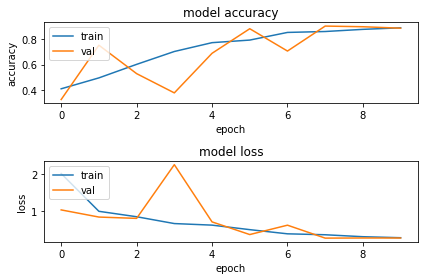

In [253]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

In [254]:
results = confusion_matrix(data_test.Label, prediction_labels)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(data_test.Label, prediction_labels))
print ('Report : ')
print (classification_report(data_test.Label, prediction_labels))

Confusion Matrix :
[[311  28  11]
 [  3 360  19]
 [ 12  37 286]]
Accuracy Score : 0.8969072164948454
Report : 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       350
           1       0.85      0.94      0.89       382
           2       0.91      0.85      0.88       335

    accuracy                           0.90      1067
   macro avg       0.90      0.89      0.90      1067
weighted avg       0.90      0.90      0.90      1067



                        Convolution Neural Network


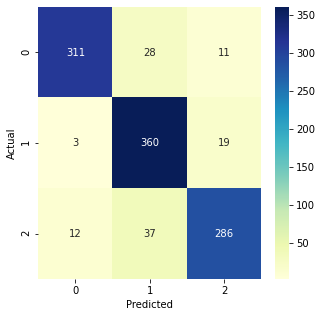

In [255]:
from sklearn.metrics import confusion_matrix
print("                        Convolution Neural Network")
conf_mat = confusion_matrix(data_test.Label, prediction_labels)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap ='YlGnBu',
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Testing CNN using KFold cross validation

In [256]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import zscore
from sklearn import metrics
import tensorflow as tf
import random

f_score=[]
fold = 10
label_names = ['0', '1', '2']
num_epochs = 5
batch_size = 32
#oos_y = []
#oos_pred = []
results = []
#for train, test in kf.split(data["tokens"], data['Label']):

for i in range(fold):
    print("Fold: ", i+1)
    random_num = np.random.randint(1,7000, 1)[0]
    data_train, data_test = train_test_split(data, test_size=0.10, shuffle = True, random_state = random_num)

    # # total training words
    totalTrainingWords = [word for tokens in data_train["tokens"] for word in tokens]

    # # Storing Length of the training sentence
    lengthTrainingSentences = [len(tokens) for tokens in data_train["tokens"]]

    # # training Vocabulary size
    trainingVocabSize = sorted(list(set(totalTrainingWords)))

    ## Total number of lines
    linesCount = len(data_train["tokens"])
    
    tokenizer = Tokenizer(num_words=len(trainingVocabSize), lower=True, char_level=False)
    tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
    training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

    train_word_index = tokenizer.word_index
    cnnTrainData = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    
    train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
    
    for word,index in train_word_index.items():
        train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
        
    test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
    cnnTestData = pad_sequences(test_sequences, maxlen= MAX_SEQUENCE_LENGTH)
    
    # Splitting train data into X_train and y_train
    y_train = data_train[label_names].values
    x_train = cnnTrainData
    y_tr = y_train
    
    # Splitting train data into X_test and y_test
    y_test = data_test[label_names].values
    x_test = cnnTestData
    y_tst = y_test
    
    # create model
    model = ConvolutionalNeuralNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, len(list(label_names)))
    
    #Train Model
    history = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)
      
    # model evaluate
    
    print("Results for current fold:")
    results.append(model.evaluate(x_test, y_tst, batch_size=128))

model.save('model_CNN.h5')    

Fold:  1
Epoch 1/5
270/270 [==============================] - 17s 62ms/step - loss: 0.6622 - accuracy: 0.7223 - val_loss: 0.2681 - val_accuracy: 0.8948
Epoch 2/5
270/270 [==============================] - 17s 61ms/step - loss: 0.3082 - accuracy: 0.8808 - val_loss: 0.2244 - val_accuracy: 0.9156
Epoch 3/5
270/270 [==============================] - 16s 61ms/step - loss: 0.2481 - accuracy: 0.9088 - val_loss: 0.2062 - val_accuracy: 0.9250
Epoch 4/5
270/270 [==============================] - 17s 61ms/step - loss: 0.2152 - accuracy: 0.9203 - val_loss: 0.2926 - val_accuracy: 0.8802
Epoch 5/5
270/270 [==============================] - 17s 61ms/step - loss: 0.2042 - accuracy: 0.9272 - val_loss: 0.2131 - val_accuracy: 0.9292
Results for current fold:
9/9 [==============================] - 0s 44ms/step - loss: 0.2620 - accuracy: 0.9175
Fold:  2
Epoch 1/5
270/270 [==============================] - 17s 62ms/step - loss: 0.7129 - accuracy: 0.7025 - val_loss: 0.2957 - val_accuracy: 0.8885
Epoch 2/5
27

In [257]:
import statistics 

score = []
for i in results:
    score.append(i[1])
x = statistics.mean(score)
    
print("Kfold Mean: ", x)

Kfold Mean:  0.9307403922080993


In [258]:
# translator
translator = Translator()

In [259]:

# 1
hin_text =  "इसलाम सुंदर है"
print("Hindi: ", hin_text)

trans = translator.translate(hin_text, dest='en')
print('Translated:', trans.text)
texts = [trans.text]
print('Predicted Label: ',makeprediction(texts))

Hindi:  इसलाम सुंदर है
Translated: Islam is beautiful
Predicted Label:  2


In [260]:
# 0
hin_text =  " समाज वादी  पार्टी  जिंदाबाद "
print("Hindi: ", hin_text)

trans = translator.translate(hin_text, dest='en')
print('Translated:', trans.text)
texts = [trans.text]
print('Predicted Label: ',makeprediction(texts))

Hindi:   समाज वादी  पार्टी  जिंदाबाद 
Translated: Samajwadi Party Zindabad
Predicted Label:  2


In [265]:
# 2
hin_text =  "'गाजा में दीवाली की ढेरो बधाई मित्रो 😊💐  #IsraeliBombing 😂😂"
print("Hindi: ", hin_text)

trans = translator.translate(hin_text, dest='en')
print('Translated:', trans.text)
texts = [trans.text]
print('Predicted Label: ',makeprediction(texts))

Hindi:  'गाजा में दीवाली की ढेरो बधाई मित्रो 😊💐  #IsraeliBombing 😂😂
Translated: 'Happy Diwali greetings in Gaza Friends 😊💐 #IsraeliBombing 😂😂
Predicted Label:  0


In [266]:
#0
texts = ["Sachin: Once there was a fight between Yusuf and Bhajji. Sehwag: Paji, was he Muhammad Yusuf or Yusuf Youhana at that time. This man will not let him live even after retirement."]
print(makeprediction(texts))

2


In [267]:
# 2
texts = ["'@ Chatterj1Asking has blew you there, the police have blamed jihadis'"]
print(makeprediction(texts))

0


In [268]:
# 1
texts = ["She follows islam"]
print(makeprediction(texts))

2


### Reference
[1] "Convolutional Neural Networks for Sentence Classification" by Yoon Kim
